In [1]:
from transformer_payne import TransformerPayne
import matplotlib.pyplot as plt
import numpy as np

The model will be downloaded from the HuggingFace hub if it wasn't found in the passed cache directory (default=```'.cache'```).

In [2]:
model = TransformerPayne.download()

/Users/mjablons/spectral-emulator/src/transformer_payne/transformer_payne.py:125: UserWarning: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte Downloading the model from HuggingFace.
  warnings.warn(str(e) + " Downloading the model from HuggingFace.")
/Users/mjablons/anaconda3/envs/tpayne/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This is all you need! You can now work with spectra by passing in the:
- logarithms of wavelengths in [log($\AA$)]
- spectral parameter values (refer to ```model.parameter_names```)
- $\mu$ - cosine of the angle between the radius and the line-of-sight

In [3]:
log_wave = np.linspace(np.log10(4500), np.log10(4600), 1000)
spectral_parameters = np.ones(94)*0.5
mu = 1.0

%time y = model(log_wave, mu, spectral_parameters)

CPU times: user 2.65 s, sys: 236 ms, total: 2.88 s
Wall time: 2.64 s


The ```IntensityEmulator``` models return a 2D array - containing a continuum and full intensity.

Text(0, 0.5, 'Normalized Intensity')

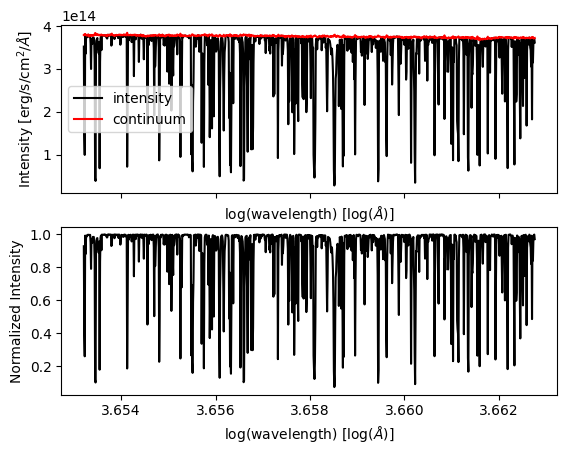

In [4]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(log_wave, y[:,0], color='black', label='intensity')
axs[0].plot(log_wave, y[:,1], color='red', label='continuum')
axs[1].plot(log_wave, y[:,0]/y[:,1], color='black')

axs[0].set_xlabel(r"log(wavelength) [log($\AA$)]")
axs[0].set_ylabel(r"Intensity [erg/s/cm$^2$/$\AA$]")
axs[0].legend()
axs[1].set_xlabel(r"log(wavelength) [log($\AA$)]")
axs[1].set_ylabel("Normalized Intensity")